<a href="https://colab.research.google.com/github/dayekb/Study/blob/main/rus/UrFU/%D0%98%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B%20%D0%B8%20%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8%20%D0%B2%20%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D0%B5/2%20%D1%81%D0%B5%D0%B7%D0%BE%D0%BD/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D1%8B%20(ipynb)/ML_2_10_3_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт и установка хорошего)

In [ ]:
!pip install diffusers transformers scipy ftfy "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 502 kB 5.2 MB/s 
     |████████████████████████████████| 5.8 MB 49.2 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 56.8 MB/s 
     |████████████████████████████████| 182 kB 58.6 MB/s 
     |████████████████████████████████| 7.6 MB 42.1 MB/s 


In [ ]:
import os
import google.colab.output

import torch
from torch import autocast

from diffusers import StableDiffusionPipeline

from huggingface_hub import notebook_login
from PIL import Image, ImageDraw

device = 'cuda'

# Подключаемся к Hugging Face

1. Регаемся на сайте [Hugging Face](https://huggingface.co/)

2. [Странница Модели](https://huggingface.co/CompVis/stable-diffusion-v1-4?)

Вроде как надо будет еще согласиться с условиями этой модели

3. Находим в личном кабинете Токены Доступа

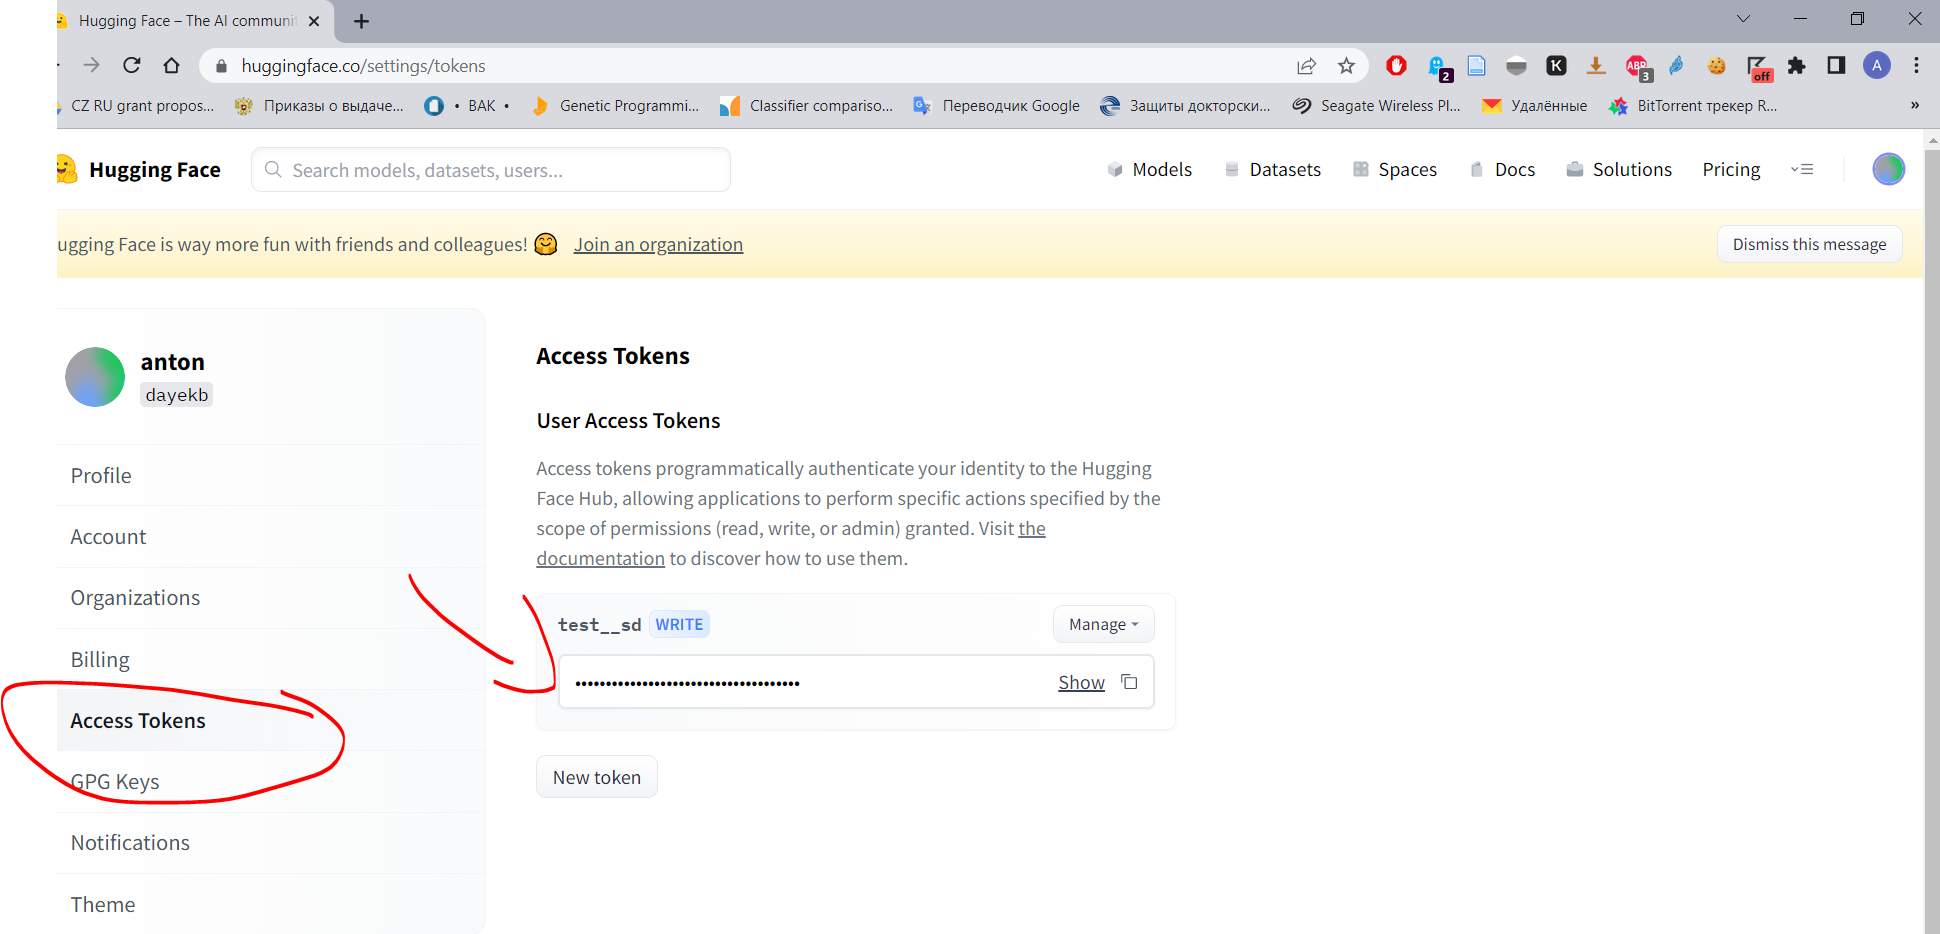

4. Запускаем ячейку ниже и вставляем туда скопированный токен

In [ ]:
google.colab.output.enable_custom_widget_manager()
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


5. Теперь колаб поймет что вы - это вы и позволит работать с модельками

# Pipeline по Умолчанию

Нажимаем и ждем пару минут)

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4', 
    revision='fp16',
    tourch_dtype=torch.float16, 
    use_auth_token=True
)
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'tourch_dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


# Можем рисовать

Можно просить рисовать "что-то" и "как-то"

  0%|          | 0/50 [00:00<?, ?it/s]

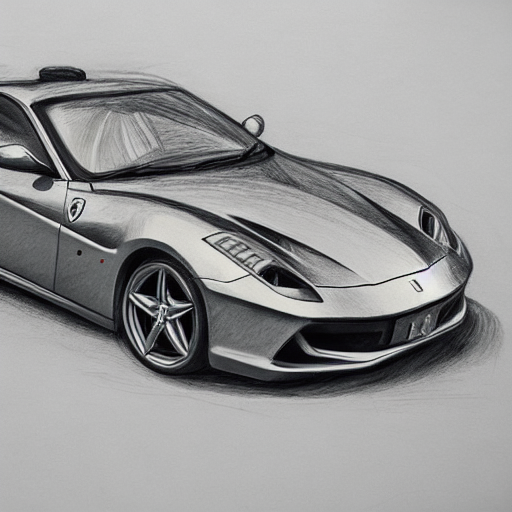

In [ ]:
prompt = 'A grey sketch on paper of a Ferrari car, full car, pencil art'
with autocast(device):
    image = pipe(prompt)['images'][0]
image

  0%|          | 0/51 [00:00<?, ?it/s]

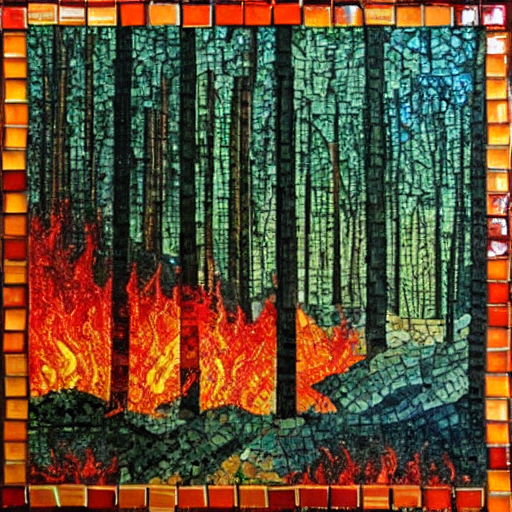

In [ ]:
prompt = 'Forest on Fire, mosaic'
with autocast(device):
    image = pipe(prompt)['images'][0]
image

  0%|          | 0/51 [00:00<?, ?it/s]

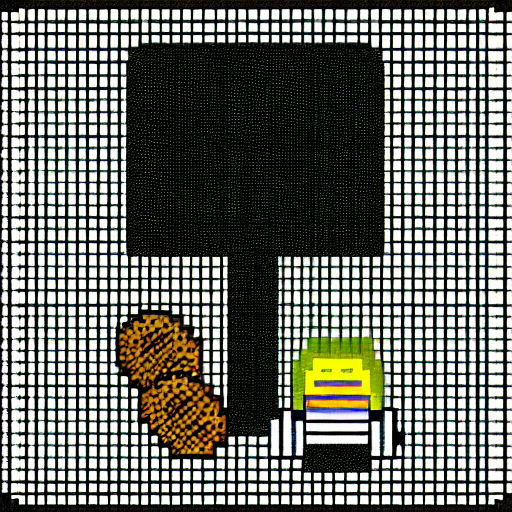

In [ ]:
prompt = 'Bread and Butter, pixel art'
with autocast(device):
    image = pipe(prompt)['images'][0]
image

  0%|          | 0/51 [00:00<?, ?it/s]

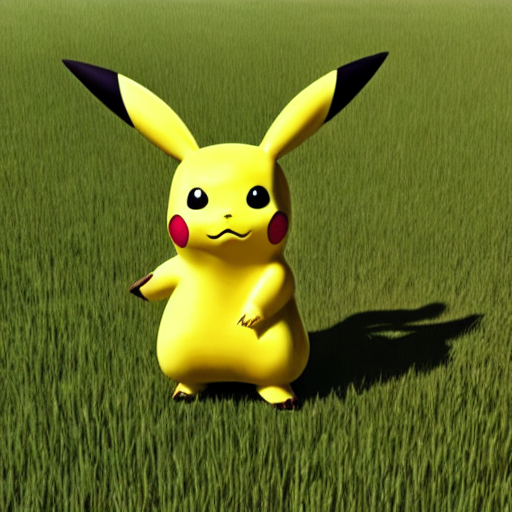

In [ ]:
prompt = 'Pikachu in field, hd, realistic '
with autocast(device):
    image = pipe(prompt)['images'][0]
image

# Ссылка на оригинальную статью на habr

Тут еще больше описано вариантов

[Респект Автору](https://habr.com/ru/post/688204/)

Можно "разбить на кирпичики"